In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import copy
import pyzx
from typing import List,Tuple
from pyzx.graph.base import BaseGraph, VT, ET
import math
import random
import time
import matplotlib.pyplot as plt
import pyzx
from pyzx.graph.base import BaseGraph
from pyzx.graph import Graph
from typing import List, Tuple
import pennylane as qml
from tqdm import tqdm
import tempfile



In [2]:
#回路セット読み込み
#一分ぐらいかかる
[ds] = qml.data.load("op-t-mize")

pyzx_circuits = []

for i, qscript in enumerate(ds.circuits):
    try:
        # QuantumScript を OpenQASM 2.0 に変換
        qasm_str = qscript.to_openqasm(
            wires=None,
            rotations=False,
            measure_all=False,
            precision=8
        )

        # QASM を一時ファイル経由で PyZX に読み込む
        with tempfile.NamedTemporaryFile(suffix=".qasm", mode='w+', delete=False) as tmpfile:
            tmpfile.write(qasm_str)
            tmpfile.flush()
            zx_circuit = pyzx.Circuit.load(tmpfile.name)

        # 元の回路名を設定（PyZX Circuit に名前属性を追加）
        zx_circuit.name = ds.circuit_names[i]
        pyzx_circuits.append(zx_circuit)
        
    except Exception as e:
        print(f"回路 {i}（{ds.circuit_names[i]}）の変換に失敗: {e}")

#読み込んだ回路の確認
print(len(pyzx_circuits))
for i, zx_circuit in enumerate(pyzx_circuits):
    dict = zx_circuit.stats_dict()
    print(dict)

31
{'name': 'mod5_4', 'qubits': 5, 'gates': 63, 'tcount': 28, 'clifford': 35, 'twoqubit': 28, 'cnot': 28, 'had': 6, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
{'name': 'vbe_adder_3', 'qubits': 10, 'gates': 150, 'tcount': 70, 'clifford': 80, 'twoqubit': 70, 'cnot': 70, 'had': 10, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
{'name': 'csla_mux_3_original', 'qubits': 15, 'gates': 170, 'tcount': 70, 'clifford': 100, 'twoqubit': 80, 'cnot': 80, 'had': 20, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
{'name': 'csum_mux_9_corrected', 'qubits': 30, 'gates': 448, 'tcount': 196, 'clifford': 252, 'twoqubit': 168, 'cnot': 168, 'had': 56, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
{'name': 'qcla_com_7', 'qubits': 24, 'gates': 443, 'tcount': 203, 'clifford': 240, 'twoqubit': 186, 'cnot': 186, 'had': 39, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}
{'name': 'qcla_mod_7', 'qubits': 26, 'gates': 884, 'tcount': 413, 'clifford': 471, 'twoqub

回路名: gf2^4_mult
{'name': 'gf2^4_mult', 'qubits': 12, 'gates': 243, 'tcount': 112, 'clifford': 131, 'twoqubit': 99, 'cnot': 99, 'had': 32, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}



--- 焼きなまし法を開始 ---
初期スコア: 56
  T=10.0000, iter=1, 遷移回数=1 -> 新しい最良スコア: 52
温度更新: 9.5000, 現在スコア: 52, 最良スコア: 52
温度更新: 9.0250, 現在スコア: 52, 最良スコア: 52
温度更新: 8.5738, 現在スコア: 58, 最良スコア: 52
温度更新: 8.1451, 現在スコア: 54, 最良スコア: 52
温度更新: 7.7378, 現在スコア: 52, 最良スコア: 52
温度更新: 7.3509, 現在スコア: 52, 最良スコア: 52
  T=7.3509, iter=7, 遷移回数=6 -> 新しい最良スコア: 51
温度更新: 6.9834, 現在スコア: 51, 最良スコア: 51
  T=6.9834, iter=8, 遷移回数=7 -> 新しい最良スコア: 49
温度更新: 6.6342, 現在スコア: 49, 最良スコア: 49
温度更新: 6.3025, 現在スコア: 49, 最良スコア: 49
温度更新: 5.9874, 現在スコア: 53, 最良スコア: 49
温度更新: 5.6880, 現在スコア: 56, 最良スコア: 49
温度更新: 5.4036, 現在スコア: 56, 最良スコア: 49
温度更新: 5.1334, 現在スコア: 50, 最良スコア: 49
温度更新: 4.8767, 現在スコア: 52, 最良スコア: 49
温度更新: 4.6329, 現在スコア: 51, 最良スコア: 49
温度更新: 4.4013, 現在スコア: 56, 最良スコア: 49
温度更新: 4.1812, 現在スコア: 54, 最良スコア: 49
温度更新: 3.9721, 現在スコア: 54, 最良スコア: 49
温度更新: 3.7735, 現在スコア: 49, 最良スコア: 49
温度更新: 3.5849, 現在スコア: 49, 最良スコア: 49
温度更新: 3.4056, 現在スコア: 49, 最良スコア: 49
温度更新: 3.2353, 現在スコア: 49, 最良スコア: 49
温度更新: 3.0736, 現在スコア: 49, 最良スコア: 49
温度更新: 2.9199, 現在スコア: 50, 最良スコア: 49
 


--- パフォーマンスグラフ ---


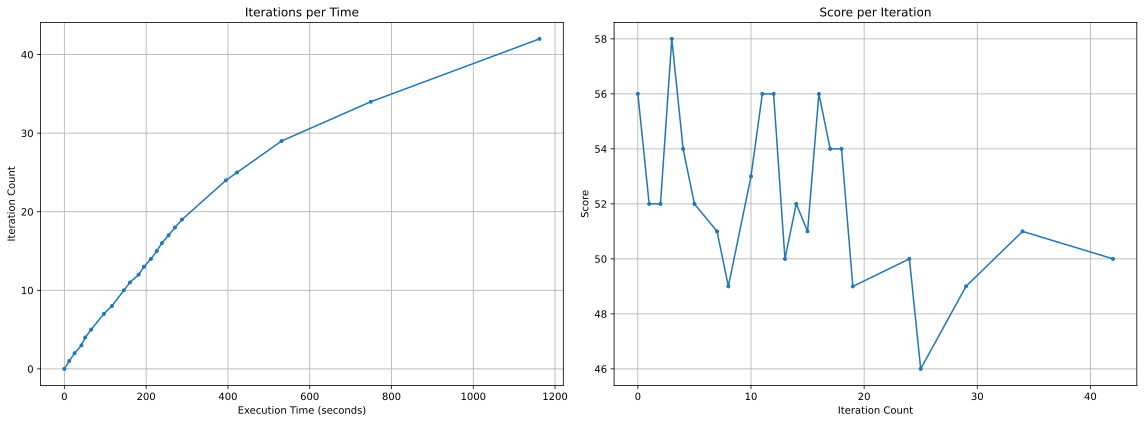

最終的なTスコア: 52
最終的なゲート数: {'all': 302, 'two': 231, 'one': 71, 't': 53}


In [4]:
from  sa_util import *
#circuit_setup
circuit = None
for zx_circuit in pyzx_circuits:
    if hasattr(zx_circuit, 'name') and zx_circuit.name == "gf2^4_mult":
        circuit = zx_circuit
        break

if circuit is not None:
    print(f"回路名: {circuit.name}")
    print(circuit.stats_dict())
else:
    print("回路は見つかりませんでした。")

g = pyzx.simplify.teleport_reduce(circuit.to_graph())
pyzx.draw(g,labels=True)
initial_graph = g
pyzx.simplify.spider_simp(initial_graph)
pyzx.simplify.to_gh(initial_graph)
pyzx.simplify.id_simp(initial_graph)

initial_score = score_t(initial_graph)

# 2. 焼きなまし法の設定と実行
print("\n--- 焼きなまし法を開始 ---")
sa = SimulatedAnnealer_T(
    initial_temp=10.0,
    final_temp=1,
    cooling_rate=0.95,
)
best_graph, best_score_result, score_history = sa.solve(
    initial_state=initial_graph,
    evaluate_func=score_t,
)

# 3. 結果の表示
display_results(initial_score, best_graph, best_score_result, score_history)


In [6]:
for i in range(10):
    print(score_t(best_graph))

54
50
47
54
52
54
46
52
54
52


In [7]:
from  sa_util_new import *
#circuit_setup
circuit = None
for zx_circuit in pyzx_circuits:
    if hasattr(zx_circuit, 'name') and zx_circuit.name == "gf2^4_mult":
        circuit = zx_circuit
        break

if circuit is not None:
    print(f"回路名: {circuit.name}")
    print(circuit.stats_dict())
else:
    print("回路は見つかりませんでした。")

g = pyzx.simplify.teleport_reduce(circuit.to_graph())
pyzx.draw(g,labels=True)
initial_graph = g
pyzx.simplify.spider_simp(initial_graph)
pyzx.simplify.to_gh(initial_graph)
pyzx.simplify.id_simp(initial_graph)

initial_score = score_t(initial_graph)


# ステップ2: 焼きなまし法の設定と実行
print("\n--- 焼きなまし法を開始 ---")
INITIAL_TEMP = 10.0
FINAL_TEMP = 1
COOLING_RATE = 0.95

sa = SimulatedAnnealer_T(
    initial_temp=INITIAL_TEMP,
    final_temp=FINAL_TEMP,
    cooling_rate=COOLING_RATE,
)

# ★★★ solveの戻り値を5つ全て受け取るように修正 ★★★
best_graph, best_score, history, timings, total_time = sa.solve(
    initial_state=initial_graph,
    evaluate_func=score_t,
)


# ステップ3: 結果の表示
display_results(initial_score, best_graph, best_score, history)


# ステップ4: 全ての結果をJSONファイルに出力
print("\n--- JSONファイルへの出力を開始 ---")
sa_params = {
    "initial_temp": INITIAL_TEMP,
    "final_temp": FINAL_TEMP,
    "cooling_rate": COOLING_RATE
}
final_stats = get_gate_num(best_graph)

export_results_to_json(
    circuit_name="aaa",
    sa_params=sa_params,
    total_time=total_time,
    timings=timings,
    history=history,
    initial_stats=initial_score,
    final_stats=final_stats,
    best_graph=best_graph
)


回路名: gf2^4_mult
{'name': 'gf2^4_mult', 'qubits': 12, 'gates': 243, 'tcount': 112, 'clifford': 131, 'twoqubit': 99, 'cnot': 99, 'had': 32, 'measurement': 0, 'other': 0, 'depth': 0, 'depth_cz': 0}



--- 焼きなまし法を開始 ---
初期スコア: 61
  T=10.0000, iter=1, 遷移回数=1 -> 新しい最良スコア: 53
  T=9.5099, iter=6, 遷移回数=5 -> 新しい最良スコア: 52
  T=9.4148, iter=7, 遷移回数=6 -> 新しい最良スコア: 51


KeyboardInterrupt: 

In [19]:
from  sa_util import *

c = generate_H_S_CNOT_T_circuit(6, 300, p_t=0.08, seed=1000) 
print(c.stats())

#pre proc
g = c.to_graph()
g2 = g.copy()
pyzx.simplify.to_gh(g)
pyzx.simplify.spider_simp(g)
pyzx.simplify.id_simp(g)
pyzx.draw(g,labels=True)

print(pyzx.gflow.gflow(g))

#neibour_unfusion(g,21,24,sign_flag=False)
a,b = get_candidate_of_neighbor_unfusion(g)
print(a,b)
g  =neighbor_unfusion(g,a,b)

pyzx.draw(g,labels=True)


print(pyzx.gflow.gflow(g))
print(pyzx.compare_tensors(g,g2))
c = pyzx.extract.streaming_extract(g)




Circuit  on 6 qubits with 300 gates.
        21 is the T-count
        279 Cliffords among which
        102 2-qubit gates (102 CNOT, 0 other) and
        89 Hadamard gates.


({400: 41, 385: 41, 387: 41, 403: 41, 406: 41, 396: 41, 390: 40, 393: 40, 394: 40, 397: 40, 346: 39, 357: 39, 374: 39, 380: 39, 391: 39, 370: 38, 388: 38, 366: 37, 368: 37, 369: 37, 376: 37, 345: 36, 347: 36, 351: 36, 354: 36, 355: 36, 358: 36, 319: 35, 335: 35, 338: 35, 342: 35, 344: 35, 349: 35, 306: 34, 322: 34, 327: 34, 331: 34, 334: 34, 340: 34, 295: 33, 317: 33, 323: 33, 326: 33, 330: 33, 315: 32, 320: 32, 325: 32, 287: 31, 290: 31, 294: 31, 298: 31, 303: 31, 314: 31, 241: 30, 247: 30, 255: 30, 276: 30, 296: 30, 304: 30, 268: 29, 280: 29, 281: 29, 264: 28, 266: 28, 272: 28, 223: 27, 243: 27, 249: 27, 250: 27, 263: 27, 214: 26, 227: 26, 234: 26, 260: 26, 193: 25, 197: 25, 232: 25, 253: 25, 187: 24, 204: 24, 208: 24, 225: 24, 230: 24, 177: 23, 210: 23, 212: 23, 176: 22, 179: 22, 200: 22, 205: 22, 165: 21, 166: 21, 184: 21, 188: 21, 202: 21, 140: 20, 173: 20, 178: 20, 185: 20, 152: 19, 156: 19, 168: 19, 175: 19, 181: 19, 145: 18, 147: 18, 149: 18, 159: 18, 160: 18, 94: 17, 137: 17, 

({400: 42, 385: 42, 387: 42, 403: 42, 406: 42, 396: 42, 390: 41, 393: 41, 394: 41, 397: 41, 346: 40, 357: 40, 374: 40, 380: 40, 391: 40, 370: 39, 388: 39, 366: 38, 368: 38, 369: 38, 376: 38, 345: 37, 347: 37, 351: 37, 354: 37, 355: 37, 358: 37, 319: 36, 335: 36, 338: 36, 342: 36, 344: 36, 349: 36, 306: 35, 322: 35, 327: 35, 331: 35, 334: 35, 340: 35, 295: 34, 317: 34, 323: 34, 326: 34, 330: 34, 315: 33, 320: 33, 325: 33, 287: 32, 298: 32, 303: 32, 314: 32, 415: 32, 241: 31, 247: 31, 296: 31, 304: 31, 414: 31, 276: 30, 280: 30, 281: 30, 290: 30, 255: 29, 264: 29, 268: 29, 272: 29, 223: 28, 243: 28, 249: 28, 250: 28, 266: 28, 214: 27, 227: 27, 234: 27, 263: 27, 193: 26, 260: 26, 197: 25, 232: 25, 253: 25, 187: 24, 204: 24, 208: 24, 225: 24, 230: 24, 177: 23, 210: 23, 212: 23, 176: 22, 179: 22, 200: 22, 205: 22, 165: 21, 166: 21, 184: 21, 188: 21, 202: 21, 140: 20, 173: 20, 178: 20, 185: 20, 152: 19, 156: 19, 168: 19, 175: 19, 181: 19, 145: 18, 147: 18, 149: 18, 159: 18, 160: 18, 94: 17, 